# Decision Tree Classifier

In [1]:
from sklearn.datasets import load_iris, fetch_california_housing
import seaborn as sns
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.metrics import accuracy_score, classification_report, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = load_iris()

In [3]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
df = sns.load_dataset('iris')

In [6]:
# Independent and Dependent Features
X = df.iloc[:,:-1]
y = dataset.target

In [7]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

## Importing Model

In [8]:
classifier = DecisionTreeClassifier(criterion='entropy')

In [9]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [10]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


[Text(0.4444444444444444, 0.9285714285714286, 'X[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.6428571428571429, 'X[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.5, 'X[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'X[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.21428571428571427, 'X[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3333333333333333, 0.0714285714

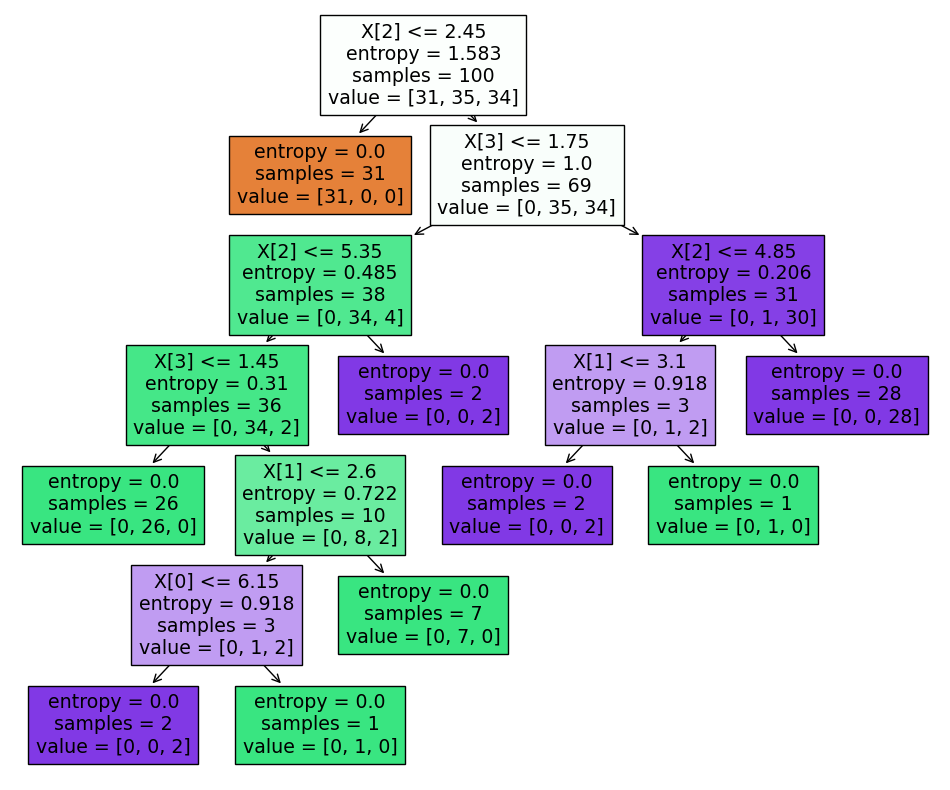

In [11]:
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

## Post Prunning

In [12]:
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=2)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]')]

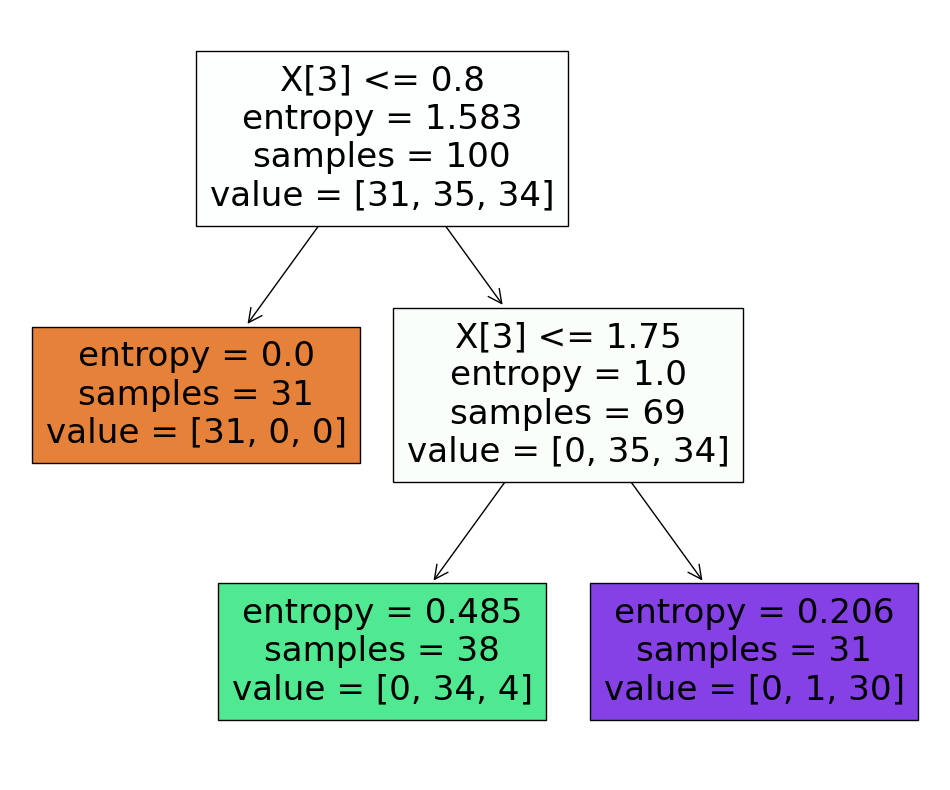

In [13]:
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

## Making Predictions

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [16]:
# Evaluating the Metrics
score = accuracy_score(y_pred,y_test)

print(score)
print(classification_report(y_pred,y_test))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Prepruning And Hyperparameter Tuning For Huge Data

In [17]:
parameter = {
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [18]:
classifier = DecisionTreeClassifier()
clf = GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')

In [19]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [20]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'auto',
 'splitter': 'best'}

In [21]:
y_pred = clf.predict(X_test)

In [22]:
score = accuracy_score(y_pred,y_test)

print(score)
print(classification_report(y_pred,y_test))

0.68
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.48      0.65        31
           2       0.00      0.00      0.00         0

    accuracy                           0.68        50
   macro avg       0.67      0.49      0.55        50
weighted avg       1.00      0.68      0.78        50



## Implementing Regressor

In [23]:
# California House Pricing Dataset
california_df = fetch_california_housing()

In [24]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [25]:
df = pd.DataFrame(california_df.data, columns = california_df.feature_names)
df['Target'] = california_df.target

In [26]:
df.shape

(20640, 9)

In [27]:
# Taking smaples of the whole dataset
df = df.sample(frac = 0.25)

In [28]:
df.shape

(5160, 9)

In [29]:
# Independent and Dependent Features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [30]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14399,2.4672,37.0,3.153846,1.000000,645.0,1.710875,32.75,-117.25
11914,3.7344,31.0,5.677019,1.099379,556.0,3.453416,33.95,-117.44
4943,2.1382,46.0,2.935829,1.139037,1510.0,4.037433,34.02,-118.28
3078,6.2885,6.0,6.909449,1.102362,664.0,2.614173,35.47,-118.92
15710,4.4464,52.0,4.394919,1.064665,831.0,1.919169,37.79,-122.44


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 42)

In [32]:
regressor = DecisionTreeRegressor()

In [33]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
y_pred = regressor.predict(X_test)

In [35]:
y_pred

array([1.639, 2.656, 3.337, ..., 2.188, 1.892, 2.042])

In [36]:
score = r2_score(y_pred, y_test)

In [37]:
score

0.49650399494896413

## Regressor CV

In [38]:
parameter = {
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [39]:
regressorcv = GridSearchCV(regressor, param_grid=parameter, cv=2, scoring='neg_mean_squared_error')

In [40]:
regressorcv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [41]:
regressorcv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 11,
 'max_features': 'auto',
 'splitter': 'random'}

In [42]:
regressor1 = DecisionTreeRegressor(criterion = 'absolute_error', max_depth=11, max_features='auto', splitter='random')

In [43]:
regressor1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=11,
                      max_features='auto', splitter='random')

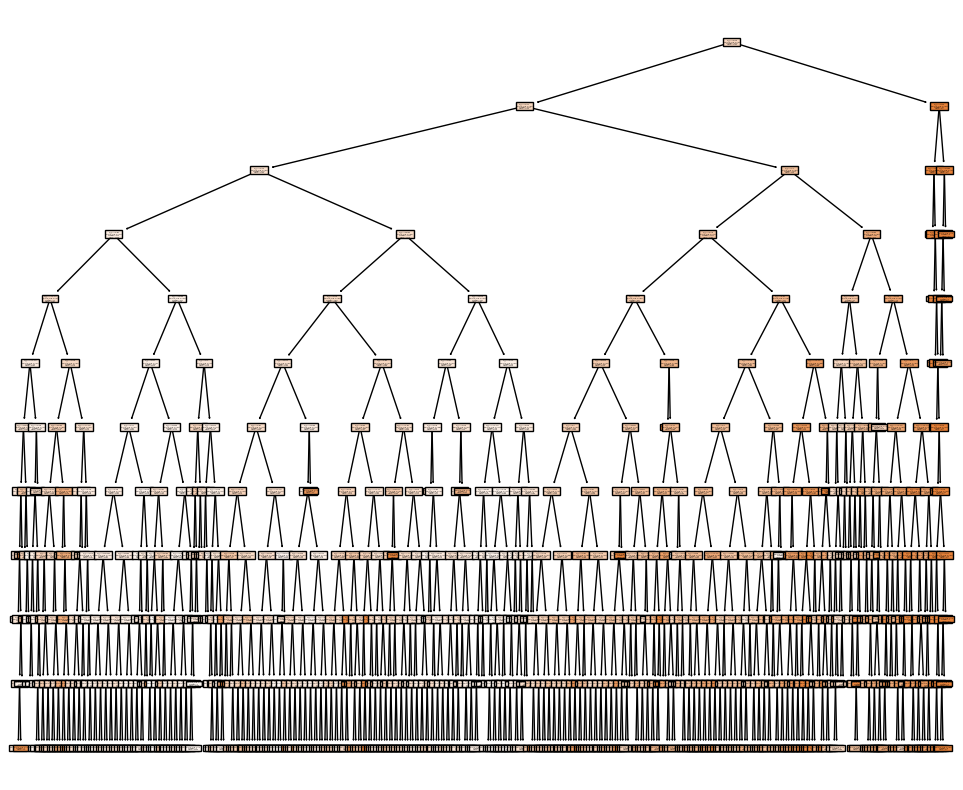

In [44]:
plt.figure(figsize=(12,10))
tree.plot_tree(regressor1, filled=True)
plt.show()

In [45]:
y_pred = regressorcv.predict(X_test)

In [46]:
r2_score(y_pred, y_test)

0.4687023968373567

### Using Different Parameter

In [47]:
regressor2 = DecisionTreeRegressor(criterion='absolute_error',max_depth=7,max_features='auto',splitter='best')

In [48]:
regressor2.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='auto')

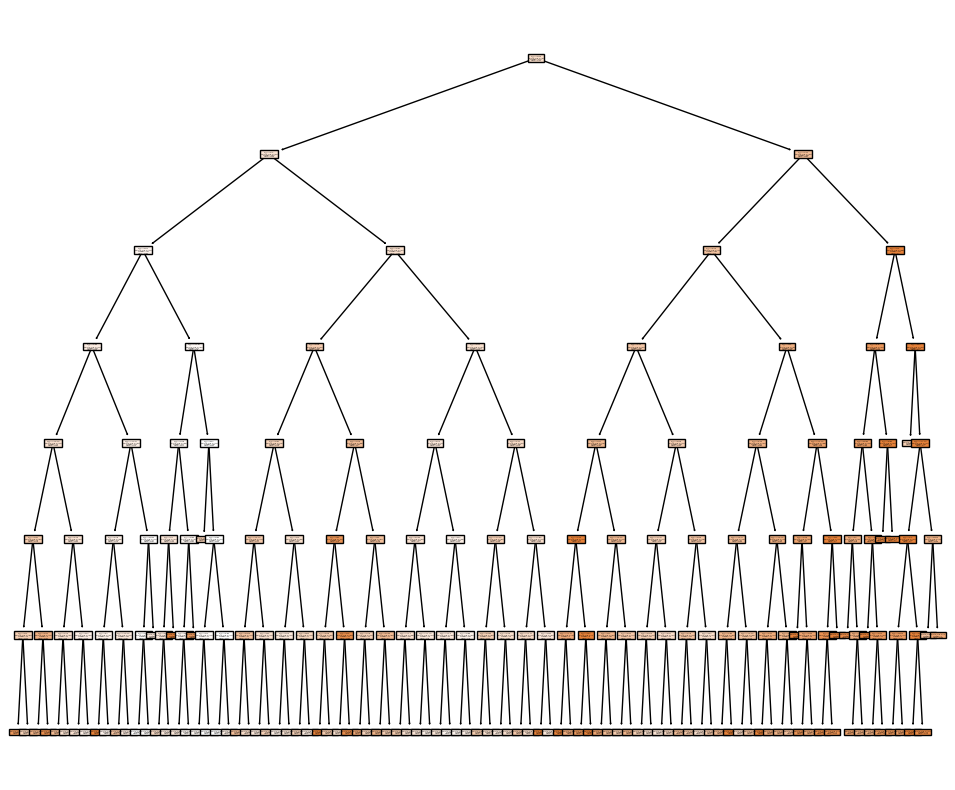

In [49]:
plt.figure(figsize=(12,10))
tree.plot_tree(regressor2,filled=True)
plt.show()

In [50]:
y_pred = regressorcv.predict(X_test)

In [51]:
r2_score(y_pred, y_test)

0.4687023968373567